In [1]:
from sklearn.metrics import accuracy_score
from tabpfn.scripts.decision_boundary import DecisionBoundaryDisplay
from tabpfn import TabPFNClassifier
import pandas as pd
import time
from tabpfn.scripts.decision_boundary import DecisionBoundaryDisplay

In [2]:
import warnings
from ucimlrepo import fetch_ucirepo
warnings.filterwarnings('ignore')

In [3]:
import import_ipynb
import numpy as np
import torch

In [52]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
Xf = iris.data.features 
yf = iris.data.targets 
classes=yf['class'].unique().tolist()
perm = np.random.permutation(150).tolist()
Xf,yf=Xf.iloc[perm],yf.iloc[perm]

In [53]:
yf.columns

Index(['class'], dtype='object')

In [54]:
def encode_target(t,classes=classes):
    return classes.index(t)
yf['label']=yf['class'].apply(encode_target)

/var/folders/jz/466kbks91q3glsb0kx0kfwk80000gq/T/ipykernel_19838/3302370216.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yf['label']=yf['class'].apply(encode_target)


In [55]:
train_n=100
X=torch.tensor(Xf.iloc[0:train_n].values, dtype=torch.float32)
y=torch.tensor(yf.iloc[0:train_n]['label'].values,dtype=torch.float32)
Xtest=torch.tensor(Xf.iloc[train_n:].values,dtype=torch.float32)
ytest=torch.tensor(yf[train_n:]['label'].values,dtype=torch.float32)

In [56]:
classifier = TabPFNClassifier(device='cpu', N_ensemble_configurations=4)

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


In [9]:
classifier.model

(inf,
 inf,
 TransformerModel(
   (transformer_encoder): TransformerEncoderDiffInit(
     (layers): ModuleList(
       (0-11): 12 x TransformerEncoderLayer(
         (self_attn): MultiheadAttention(
           (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
         )
         (linear1): Linear(in_features=512, out_features=1024, bias=True)
         (dropout): Dropout(p=0.0, inplace=False)
         (linear2): Linear(in_features=1024, out_features=512, bias=True)
         (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
         (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
         (dropout1): Dropout(p=0.0, inplace=False)
         (dropout2): Dropout(p=0.0, inplace=False)
       )
     )
   )
   (encoder): Linear(in_features=100, out_features=512, bias=True)
   (y_encoder): Linear(in_features=1, out_features=512, bias=True)
   (decoder): Sequential(
     (0): Linear(in_features=512, out_features=1024, bias=True)


In [10]:
X.shape

torch.Size([100, 4])

In [22]:
start = time.time()
classifier.fit(X, y,overwrite_warning=True)
y_eval, p_eval = classifier.predict(Xtest, return_winning_probability=True)
prediction_time = time.time() - start

/opt/homebrew/Caskroom/miniforge/base/envs/py311aml/lib/python3.11/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


In [23]:
print('Prediction time: ',prediction_time , 'Accuracy', accuracy_score(ytest, y_eval))

Prediction time:  0.10448408126831055 Accuracy 0.94


In [24]:
p_eval

array([0.9999926 , 0.9866368 , 0.74834657, 0.9998915 , 0.99994266,
       0.99863154, 0.9999702 , 0.9984988 , 0.9999919 , 0.9999714 ,
       0.9913366 , 0.99997485, 0.7999742 , 0.9999635 , 0.8903651 ,
       0.99994874, 0.99996245, 0.9999603 , 0.99981207, 0.9998579 ,
       0.99986744, 0.98205584, 0.97550654, 0.9999342 , 0.9999919 ,
       0.9997236 , 0.9989526 , 0.997274  , 0.9999887 , 0.9957961 ,
       0.99980587, 0.81233263, 0.81597406, 0.9974642 , 0.9749752 ,
       0.99997973, 0.99996066, 0.99971026, 0.99709415, 0.997617  ,
       0.9915513 , 0.83348393, 0.9998952 , 0.9999324 , 0.9991685 ,
       0.8832785 , 0.9998056 , 0.999858  , 0.99948055, 0.9999186 ],
      dtype=float32)

In [25]:
y_eval_train, p_eval_train = classifier.predict(X, return_winning_probability=True)

/opt/homebrew/Caskroom/miniforge/base/envs/py311aml/lib/python3.11/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


In [27]:
print('Prediction time: ',prediction_time , 'Accuracy', accuracy_score(y, y_eval_train))

Prediction time:  0.10448408126831055 Accuracy 0.99


In [16]:
probs=classifier.predict_proba(Xtest)

/opt/homebrew/Caskroom/miniforge/base/envs/py311aml/lib/python3.11/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


In [ ]:
probs

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(ytest, y_eval)

array([[18,  0,  0],
       [ 0, 17,  3],
       [ 0,  0, 12]])

In [30]:
def gini(probs):
    # return [1-sum([p**p for p in pv]) for pv in probs]
    return [1-sum([p**2 for p in pv]) for pv in probs]


In [31]:
gini(probs)

[1.4781849475120623e-05,
 0.026369549519126734,
 0.37666147846473197,
 0.00021693748001461177,
 0.00011467312032054089,
 0.0027337041519365224,
 5.960303980612203e-05,
 0.002997940156351242,
 1.6212341720445167e-05,
 5.721889486021148e-05,
 0.017177254927328578,
 5.030530568084224e-05,
 0.3200484652102501,
 7.295406495699819e-05,
 0.1952354029100164,
 0.00010251542038852701,
 7.509907443126185e-05,
 7.939032020087833e-05,
 0.00037579792825470637,
 0.000284156038003025,
 0.0002650877673641139,
 0.035245130265693314,
 0.04778755373865007,
 0.00013159870020651443,
 1.621234300752672e-05,
 0.0005526563753038838,
 0.0020925614907588708,
 0.005437212704362371,
 2.2649522402939937e-05,
 0.008372506102009458,
 0.00038819066137130154,
 0.3049082932304902,
 0.3003333917648118,
 0.005058815943104644,
 0.04879782793475107,
 4.0530371996805314e-05,
 7.86750684781401e-05,
 0.0005793321075754365,
 0.005794818857582262,
 0.004755156156111773,
 0.016760332888965834,
 0.2775939324805228,
 0.000209548816

In [32]:
# fetch dataset 
beans = fetch_ucirepo(id=850) 
# data (as pandas dataframes) 
Xf = beans.data.features 
yf = beans.data.targets 

In [ ]:
yf

In [ ]:
target='Class'
classes=yf[target].unique().tolist()
perm = np.random.permutation(Xf.shape[0]).tolist()
Xf,yf=Xf.iloc[perm],yf.iloc[perm]

In [ ]:
def encode_target(t,classes=classes):
    return classes.index(t)

In [ ]:
yf['label']=yf['Class'].apply(encode_target)

In [ ]:
Xf.shape

In [ ]:
train_n=700
X=torch.tensor(Xf.iloc[0:train_n].values, dtype=torch.float32)
y=torch.tensor(yf.iloc[0:train_n]['label'].values,dtype=torch.float32)
Xtest=torch.tensor(Xf.iloc[train_n:].values,dtype=torch.float32)
ytest=torch.tensor(yf[train_n:]['label'].values,dtype=torch.float32)

In [ ]:
classifier = TabPFNClassifier(device='cpu', N_ensemble_configurations=4)

In [ ]:
start = time.time()
classifier.fit(X, y,overwrite_warning=True)
y_eval, p_eval = classifier.predict(Xtest, return_winning_probability=True)
prediction_time = time.time() - start

In [ ]:
print('Prediction time: ',prediction_time , 'Accuracy', accuracy_score(ytest, y_eval))

In [ ]:
confusion_matrix(ytest, y_eval)

## Calibration

In [33]:
from torchmetrics.functional import calibration_error

<frozen importlib._bootstrap>:1047: ImportWarning: NotebookFinder.find_spec() not found; falling back to find_module()
/opt/homebrew/Caskroom/miniforge/base/envs/py311aml/lib/python3.11/site-packages/lightning_utilities/core/imports.py:14: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
<frozen importlib._bootstrap>:1047: ImportWarning: NotebookFinder.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: NotebookFinder.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: NotebookFinder.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: NotebookFinder.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: NotebookFinder.find_spec() not found; falling back to find_module()


In [34]:
from sklearn.calibration import CalibrationDisplay

In [35]:
probs=torch.tensor(classifier.predict_proba(Xtest))

/opt/homebrew/Caskroom/miniforge/base/envs/py311aml/lib/python3.11/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


In [36]:
def binarize(target,c):
    return np.array([1 if t==c else 0 for t in target])

In [37]:
binarize(ytest,0)

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0])

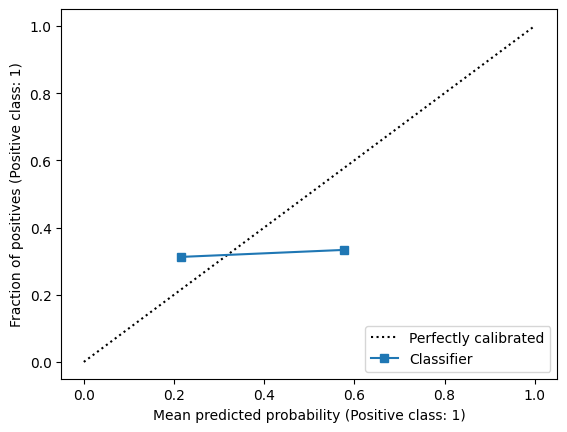

In [102]:
CalibrationDisplay.from_predictions(y_true=binarize(ytest,0),y_prob=probs.softmax(dim=1)[:,0])

In [41]:
probs_train=torch.tensor(classifier.predict_proba(X)).softmax(dim=1)

/opt/homebrew/Caskroom/miniforge/base/envs/py311aml/lib/python3.11/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


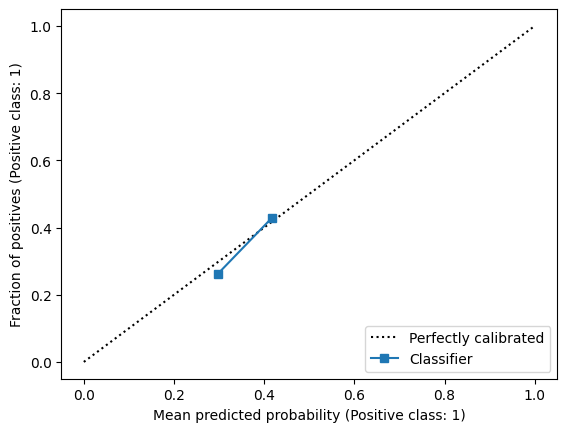

In [101]:
CalibrationDisplay.from_predictions(y_true=binarize(y,2),y_prob=probs_train.softmax(dim=1)[:,2])

In [43]:
from temperature_scaling import ModelWithTemperature

In [44]:
from functools import partial

In [45]:
import torch.nn as nn

In [46]:
class WrappedModel(nn.Module):
    def __init__(self,tabpfnmodel,label_index=None):
        super().__init__()
        self.classifier=tabpfnmodel
        self.label_index=label_index
    def __call__(self,X):
        probs=self.classifier.predict_proba(X)
        if self.label_index is None: return torch.tensor(probs)
        else: return torch.tensor(probs[:,self.label_index])

In [47]:
tabmodel=WrappedModel(classifier)

In [48]:
tabmodel(Xtest)

/opt/homebrew/Caskroom/miniforge/base/envs/py311aml/lib/python3.11/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


tensor([[9.9999e-01, 6.8951e-06, 5.1008e-07],
        [1.2413e-05, 9.8664e-01, 1.3351e-02],
        [2.6866e-05, 2.5163e-01, 7.4835e-01],
        [4.6583e-07, 1.0798e-04, 9.9989e-01],
        [9.9994e-01, 5.4013e-05, 3.3175e-06],
        [1.1386e-03, 9.9863e-01, 2.2987e-04],
        [9.9997e-01, 2.6582e-05, 3.1956e-06],
        [1.4171e-05, 9.9850e-01, 1.4870e-03],
        [9.9999e-01, 7.4457e-06, 7.1306e-07],
        [9.9997e-01, 2.7273e-05, 1.3316e-06],
        [3.0889e-05, 9.9134e-01, 8.6326e-03],
        [6.7574e-06, 9.9997e-01, 1.8335e-05],
        [4.3747e-05, 1.9998e-01, 7.9997e-01],
        [1.4704e-05, 9.9996e-01, 2.1757e-05],
        [2.3965e-05, 8.9037e-01, 1.0961e-01],
        [9.9995e-01, 4.3327e-05, 7.9865e-06],
        [5.2893e-07, 3.6982e-05, 9.9996e-01],
        [9.9996e-01, 3.8597e-05, 1.0575e-06],
        [4.6385e-06, 1.8336e-04, 9.9981e-01],
        [5.4222e-06, 9.9986e-01, 1.3670e-04],
        [5.7650e-06, 1.2683e-04, 9.9987e-01],
        [2.2338e-05, 1.7922e-02, 9

In [49]:
model=ModelWithTemperature(tabmodel)

In [57]:
from utils import MyDS

In [58]:
loader=torch.utils.data.DataLoader(MyDS(Xf.iloc[:train_n].values,yf[:train_n]['label'].values))

In [63]:
model=model.set_temperature(loader)

/opt/homebrew/Caskroom/miniforge/base/envs/py311aml/lib/python3.11/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/py311aml/lib/python3.11/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/opt/hom

Before temperature - NLL: 0.578, ECE: 0.411
Optimal temperature: 0.607
After temperature - NLL: 0.364, ECE: 0.269


/opt/homebrew/Caskroom/miniforge/base/envs/py311aml/lib/python3.11/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


In [67]:
probs_cal=model(Xtest).detach()

/opt/homebrew/Caskroom/miniforge/base/envs/py311aml/lib/python3.11/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


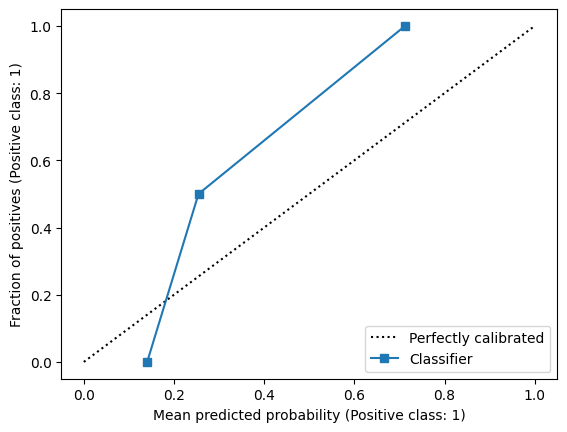

In [103]:
CalibrationDisplay.from_predictions(y_true=binarize(ytest,1),y_prob=probs_cal.softmax(dim=1)[:,1])

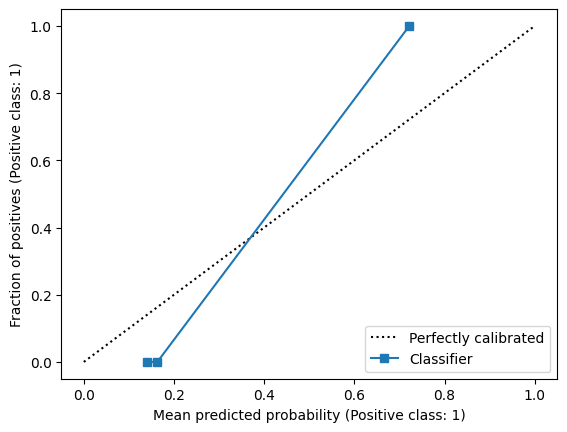

In [104]:
CalibrationDisplay.from_predictions(y_true=binarize(ytest,0),y_prob=probs_cal.softmax(dim=1)[:,0],n_bins=20)

In [85]:
calibration_error(preds=probs_cal,target=torch.tensor(ytest),task='multiclass',num_classes=3)

/var/folders/jz/466kbks91q3glsb0kx0kfwk80000gq/T/ipykernel_19838/1876881249.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  calibration_error(preds=probs_cal,target=torch.tensor(ytest),task='multiclass',num_classes=3)


tensor(0.3001)

In [84]:
calibration_error(preds=torch.tensor(probs),target=torch.tensor(ytest),task='multiclass',num_classes=3)

/var/folders/jz/466kbks91q3glsb0kx0kfwk80000gq/T/ipykernel_19838/3939058077.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  calibration_error(preds=torch.tensor(probs),target=torch.tensor(ytest),task='multiclass',num_classes=3)


tensor(0.6733)

In [79]:
from temperature_scaling import _ECELoss

In [80]:
ece=_ECELoss(n_bins=10)

In [89]:
ece.forward(probs_cal,ytest)

tensor([0.2814])

In [90]:
ece.forward(probs,ytest)

tensor([0.2661])